In [80]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_roc_curve

# scikitplot to directly plot our results
import graphviz
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

In [25]:
falcon9_df = pd.read_csv('falcon9_data_class.csv')
falcon9_df.head()

,FlightNumber,Date,RocketName,Longitude,Latitude,LaunchSite,PayloadMass,Orbit,Block,SerialNumber,ReusedCount,LandingOutcome,Flights,GridFins,Reused,Legs,LandingPad,Class
0,1,2010-06-04,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,7341.2,LEO,1.0,B0003,0,None None,1,False,False,False,NaN,0
1,2,2012-05-22,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,525.0,LEO,1.0,B0005,0,None None,1,False,False,False,NaN,0
2,3,2013-03-01,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,677.0,ISS,1.0,B0007,0,None None,1,False,False,False,NaN,0
3,4,2013-09-29,Falcon 9,-120.610829,34.632093,VAFB SLC 4E,500.0,PO,1.0,B1003,0,False Ocean,1,False,False,False,NaN,0
4,5,2013-12-03,Falcon 9,-80.577366,28.561857,CCSFS SLC 40,3170.0,GTO,1.0,B1004,0,None None,1,False,False,False,NaN,0


In [26]:
falcon9_df.isna().sum()

FlightNumber       0
Date               0
RocketName         0
Longitude          0
Latitude           0
LaunchSite         0
PayloadMass        0
Orbit              0
Block              0
SerialNumber       0
ReusedCount        0
LandingOutcome     0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Class              0
dtype: int64

In [27]:
engineered_features = pd.read_csv('engineered_features.csv')

In [28]:
engineered_features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,SerialNumber_B1051,SerialNumber_B1054,SerialNumber_B1056,SerialNumber_B1058,SerialNumber_B1059,SerialNumber_B1060,SerialNumber_B1061,SerialNumber_B1062,SerialNumber_B1063,SerialNumber_B1067
0,1,7341.2,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We use the engineered_features dataframe as the independent or X variables in our model, with the Class feature in the falcon9_df as the dependent or y variable

In [29]:
X = engineered_features
Y = falcon9_df['Class'].to_numpy()

In [129]:
falcon9_df.corr()

,FlightNumber,Longitude,Latitude,PayloadMass,Block,ReusedCount,Flights,GridFins,Reused,Legs,Class
FlightNumber,1.000000,0.071531,-0.070291,0.581178,0.863198,0.701505,0.688028,0.470174,0.683773,0.422480,0.470138
Longitude,0.071531,1.000000,-0.999960,0.106180,0.002235,0.060080,0.106038,-0.108111,0.029080,-0.034420,-0.061573
Latitude,-0.070291,-0.999960,1.000000,-0.105143,-0.000580,-0.059660,-0.105870,0.109007,-0.028709,0.035046,0.063049
PayloadMass,0.581178,0.106180,-0.105143,1.000000,0.524360,0.687427,0.683032,0.286231,0.533877,0.234365,0.237929
Block,0.863198,0.002235,-0.000580,0.524360,1.000000,0.678774,0.488566,0.494136,0.606705,0.431334,0.479460
ReusedCount,0.701505,0.060080,-0.059660,0.687427,0.678774,1.000000,0.724717,0.406620,0.594392,0.385585,0.481191
Flights,0.688028,0.106038,-0.105870,0.683032,0.488566,0.724717,1.000000,0.253777,0.665494,0.233284,0.254167
GridFins,0.470174,-0.108111,0.109007,0.286231,0.494136,0.406620,0.253777,1.000000,0.300929,0.908735,0.656281
Reused,0.683773,0.029080,-0.028709,0.533877,0.606705,0.594392,0.665494,0.300929,1.000000,0.237199,0.290575
Legs,0.422480,-0.034420,0.035046,0.234365,0.431334,0.385585,0.233284,0.908735,0.237199,1.000000,0.683353


Splitting the data into train and test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state =2)

In [31]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [32]:
lr = LogisticRegression(random_state = 2)

lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test, lr_y_pred))
print("Model Score", lr.score(X_test, y_test))


Accuracy Score: 0.84
Model Score 0.84


Logistic Regression with Hyperparameter tuning with GridSearchCV

In [33]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

logreg_cv = GridSearchCV(lr, parameters, cv=5)

logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [36]:
lr_yhat=logreg_cv.predict(X_test)

In [37]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print("GridSearch Accuracy Score", accuracy_score(y_test, lr_yhat))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8852631578947369
GridSearch Accuracy Score 0.84


In [98]:
lr_yhat=logreg_cv.predict(X_test)


In [46]:
 print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.82      0.93      0.87        15

    accuracy                           0.84        25
   macro avg       0.85      0.82      0.83        25
weighted avg       0.84      0.84      0.84        25



In [47]:
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.82      0.93      0.87        15

    accuracy                           0.84        25
   macro avg       0.85      0.82      0.83        25
weighted avg       0.84      0.84      0.84        25



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

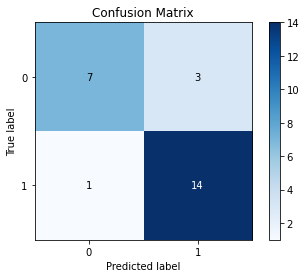

In [48]:
skplt.metrics.plot_confusion_matrix(y_test, lr_y_pred)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

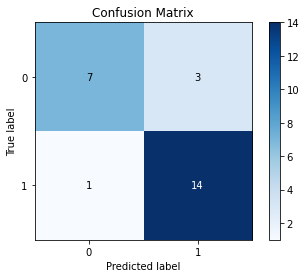

In [50]:
skplt.metrics.plot_confusion_matrix(y_test, lr_yhat)

Support Vector Machine

In [51]:
svm = SVC()

svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)

In [52]:
print("Accuracy Score:",accuracy_score(y_test, svm_y_pred))
print("Model Score", svm.score(X_test, y_test))


Accuracy Score: 0.64
Model Score 0.64


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

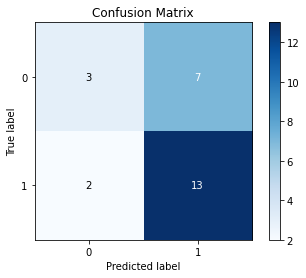

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, svm_y_pred)

In [54]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.65      0.87      0.74        15

    accuracy                           0.64        25
   macro avg       0.62      0.58      0.57        25
weighted avg       0.63      0.64      0.61        25



SVM with GridSearchCV and Hyperparameter Tuning

In [55]:
svm_parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm_cv = GridSearchCV(svm, svm_parameters, cv=10)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [56]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8855555555555557


In [57]:
svm_cv.score(X_test, y_test)

0.88

In [58]:
svm_yhat=svm_cv.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

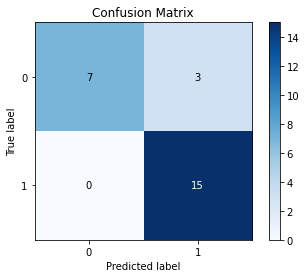

In [59]:
skplt.metrics.plot_confusion_matrix(y_test, svm_yhat)

In [60]:
print(classification_report(y_test, svm_yhat))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.83      1.00      0.91        15

    accuracy                           0.88        25
   macro avg       0.92      0.85      0.87        25
weighted avg       0.90      0.88      0.87        25



Decision Tree Classifier

In [61]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

In [62]:
print("Accuracy Score:",accuracy_score(y_test, dt_y_pred))
print("Model Score", dt.score(X_test, y_test))

Accuracy Score: 0.76
Model Score 0.76


Decision Tree Classifier with Hyperparameter Tuning

In [63]:
dt_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

dt_cv = GridSearchCV(dt, dt_parameters, cv=10)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [64]:
print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9077777777777778


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

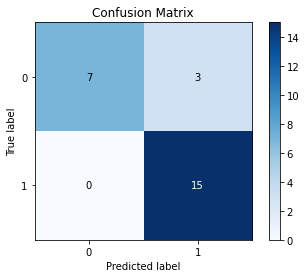

In [65]:
dt_yhat = svm_cv.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, dt_yhat)

In [66]:
print(classification_report(y_test, dt_yhat))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.83      1.00      0.91        15

    accuracy                           0.88        25
   macro avg       0.92      0.85      0.87        25
weighted avg       0.90      0.88      0.87        25



KNN model

In [67]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

In [68]:
print("Accuracy Score:",accuracy_score(y_test, knn_y_pred))

Accuracy Score: 0.6


KNN with Hyperparameter Tuning

In [69]:
knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(knn, knn_parameters, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [70]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8733333333333334


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

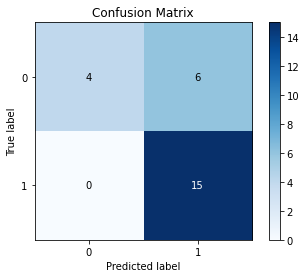

In [71]:
knn_yhat = knn_cv.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, knn_yhat)

In [106]:
print(classification_report(y_test, knn_yhat))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.71      1.00      0.83        15

    accuracy                           0.76        25
   macro avg       0.86      0.70      0.70        25
weighted avg       0.83      0.76      0.73        25



Random Forest Classifier

In [9]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

In [10]:
print("Accuracy Score:",accuracy_score(y_test, rf_y_pred))

Accuracy Score: 0.88


Random Forest Classifier with hyperparameter tuning

In [11]:
rf_parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_cv = GridSearchCV(rf, rf_parameters, cv=10)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [12]:
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
accuracy : 0.7811111111111111


In [87]:
rf_yhat = rf_cv.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

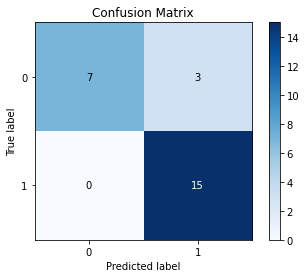

In [95]:
skplt.metrics.plot_confusion_matrix(y_test, rf_y_pred)

In [96]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.83      1.00      0.91        15

    accuracy                           0.88        25
   macro avg       0.92      0.85      0.87        25
weighted avg       0.90      0.88      0.87        25



Basline Model Scores

In [171]:
# Create a dictionary of models to use

models = {'Logistic Regression': LogisticRegression(),
         'Support Vector Machines': SVC(),
         'Decision Trees': DecisionTreeClassifier(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and trains models and returns the scores for each model
    models: a dict of machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(2)
    
    # make a dictionary to store the model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        # evaluate the model and append the score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
        

In [172]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.84,
 'Support Vector Machines': 0.64,
 'Decision Trees': 0.76,
 'KNN': 0.6,
 'Random Forest': 0.88}

<AxesSubplot:ylabel='Score'>

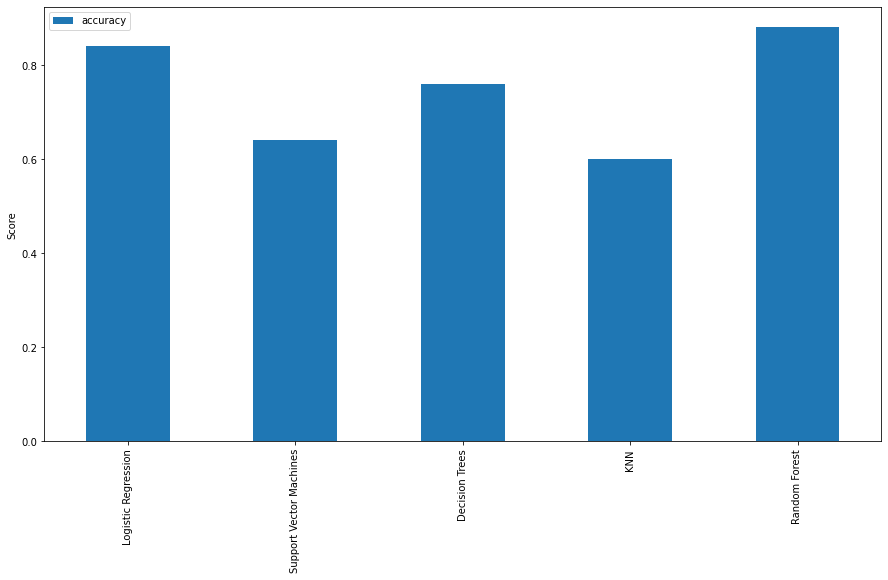

In [173]:
model_comparision = pd.DataFrame(model_scores, index = ['accuracy'])
model_comparision.T.plot(kind='bar', figsize=(15,8), ylabel='Score')

Plotting AUC-ROC curves

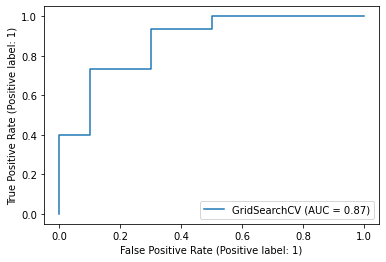

In [75]:
plot_roc_curve(logreg_cv, X_test, y_test)

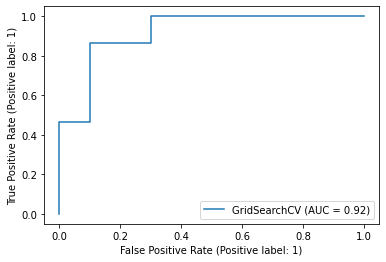

In [76]:
plot_roc_curve(svm_cv, X_test, y_test)

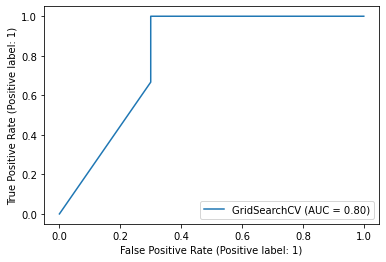

In [77]:
plot_roc_curve(knn_cv, X_test, y_test)

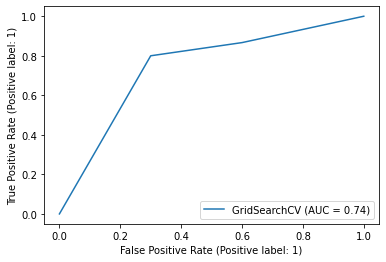

In [78]:
plot_roc_curve(dt_cv, X_test, y_test)

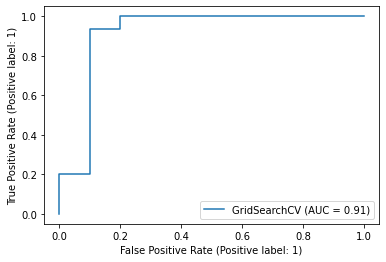

In [79]:
plot_roc_curve(rf_cv, X_test, y_test)

Cross Validation Scores for the models

In [83]:
svm_cross_val_score = cross_val_score(svm_cv, X_train, y_train, cv=5)

In [84]:
np.mean(svm_cross_val_score)

0.8852631578947369

In [120]:
logreg_cross_val_score = cross_val_score(logreg_cv, X_train, y_train, cv=5)

In [121]:
np.mean(logreg_cross_val_score)

0.8852631578947369

In [123]:
rf_cross_val_score = cross_val_score(rf_cv, X_train, y_train, cv=5)

In [124]:
np.mean(rf_cross_val_score)

0.781578947368421

In [136]:
dt_cross_val_score = cross_val_score(dt_cv, X_train, y_train, cv=5)

In [137]:
np.mean(dt_cross_val_score)

0.8757894736842106

In [125]:
feature_names = X.columns

<AxesSubplot:title={'center':'Feature Importance'}>

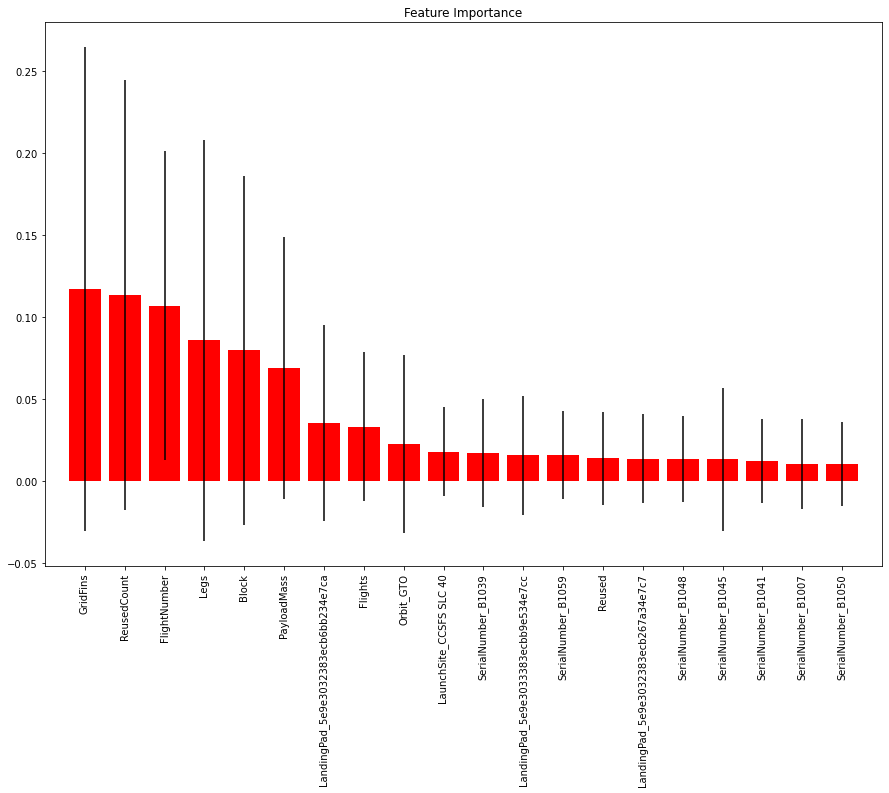

In [127]:
skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, figsize=(15, 10), x_tick_rotation=90)

Model Scores after GridSearchCV and Hyperparameter Tuning

In [167]:
gs_models = {'Logistic Regression': logreg_cv,
         'Support Vector Machines': svm_cv,
         'Decision Trees': dt_cv,
         'KNN': knn_cv,
         'Random Forest': rf_cv}

def get_gs_best_scores(models):
    gs_model_scores = {}
    best_params = {}
    for name, model in models.items():
        gs_model_scores[name] = model.best_score_
        best_params[name] = model.best_params_
        
    return gs_model_scores
        
        

In [168]:
get_gs_best_scores(gs_models)

{'Logistic Regression': 0.8852631578947369,
 'Support Vector Machines': 0.8855555555555557,
 'Decision Trees': 0.9077777777777778,
 'KNN': 0.8733333333333334,
 'Random Forest': 0.7811111111111111}

In [169]:
gs_model_scores = get_gs_best_scores(gs_models)

<AxesSubplot:ylabel='Best Score'>

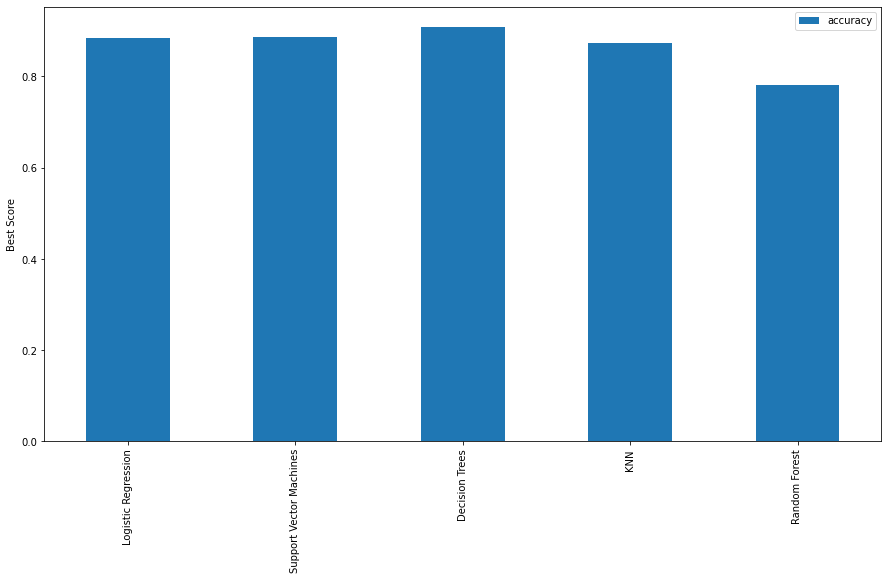

In [170]:
gs_model_comparision = pd.DataFrame(gs_model_scores, index=['accuracy'])
gs_model_comparision.T.plot(kind='bar', figsize=(15,8), ylabel='Best Score')